In [160]:
# Dependencies and Setup
from census import Census
from us import states
from config import (census_key, gkey)
import us
import gmaps
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sodapy import Socrata
import requests
import json

In [260]:
file='counties.csv'
data_df=pd.read_csv(file,encoding='ISO-8859-1')
data_df

,FIPS,County,State,Latitude,Longitude,confirm_5,confirm_10,confirm_20,confirm_50,death_5,death_10,death_20,death_50,Population,Population Density,Median Household Income,Poverty Rate
0,1001,Autauga,Alabama,32.539527,-86.644082,6.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,55049.0,93.534505,53099.0,12.165525
1,1003,Baldwin,Alabama,30.727750,-87.722071,1.0,4.0,28.0,NaN,0.0,0.0,1.0,NaN,199510.0,137.138546,51365.0,12.806877
2,1005,Barbour,Alabama,31.868263,-85.387129,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,26614.0,28.114060,33956.0,23.427519
3,1007,Bibb,Alabama,32.996421,-87.125115,4.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,22572.0,35.986169,39776.0,15.018607
4,1009,Blount,Alabama,33.982109,-86.567906,5.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,57704.0,89.697955,46212.0,16.361084
5,1011,Bullock,Alabama,32.100305,-85.712655,3.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,10552.0,16.277951,29335.0,25.852919
6,1013,Butler,Alabama,31.753001,-86.680575,1.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,20280.0,25.333449,34315.0,25.276134
7,1015,Calhoun,Alabama,33.774837,-85.826304,1.0,3.0,34.0,NaN,0.0,0.0,0.0,NaN,115883.0,188.617140,41954.0,19.101162
8,1017,Chambers,Alabama,32.913601,-85.390727,2.0,17.0,101.0,NaN,0.0,0.0,8.0,NaN,34018.0,56.347976,36027.0,20.004115
9,1019,Cherokee,Alabama,34.178060,-85.606390,2.0,5.0,NaN,NaN,0.0,0.0,NaN,NaN,25897.0,47.029486,38925.0,16.171757


In [261]:
file='hospitals.csv'
hospitals_df=pd.read_csv(file,encoding='ISO-8859-1')
hospitals_df

,hospital_name,city,state,county_name,hospital_overall_rating
0,GOODLAND REGIONAL MEDICAL CENTER,GOODLAND,KS,SHERMAN,3
1,MARIA PARHAM MEDICAL CENTER,HENDERSON,NC,VANCE,2
2,ALLEGHANY COUNTY MEMORIAL HOSPITAL,SPARTA,NC,ALLEGHANY,2
3,ADVENTIST HEALTHCARE WHITE OAK MEDICAL CENTER,SILVER SPRING,MD,MONTGOMERY,3
4,ADVENTHEALTH LAKE WALES,LAKE WALES,FL,POLK,1
5,NEWARK BETH ISRAEL MEDICAL CENTER,NEWARK,NJ,ESSEX,3
6,HOLY CROSS HOSPITAL,CHICAGO,IL,COOK,2
7,FRANCES MAHON DEACONESS HOSPITAL,GLASGOW,MT,VALLEY,4
8,AIKEN REGIONAL MEDICAL CENTER,AIKEN,SC,AIKEN,2
9,HIGHPOINT HEALTH,LAWRENCEBURG,IN,DEARBORN,4


In [262]:
#Merge county and hospital dataframes on county name
hospitals_df['county_name'] =hospitals_df['county_name'].str.capitalize()
h_df=hospitals_df.groupby(['county_name','state']).mean().reset_index()
State=[]
for row in h_df.itertuples(index=False):
    State.append(us.states.lookup(row.state).name)
h_df['State']=State
h_df=h_df[['State','county_name','hospital_overall_rating']]
h_df= h_df.rename(columns={'hospital_overall_rating': 'Average Hospital',
                                     'county_name':'County'})
merged_df = data_df.merge(h_df, how='inner', left_on=["State", "County"], right_on=["State","County"])

#Take a look at the dataframe
merged_df.head()

,FIPS,County,State,Latitude,Longitude,confirm_5,confirm_10,confirm_20,confirm_50,death_5,death_10,death_20,death_50,Population,Population Density,Median Household Income,Poverty Rate,Average Hospital
0,1001,Autauga,Alabama,32.539527,-86.644082,6.0,10.0,NaN,NaN,0.0,0.0,NaN,NaN,55049.0,93.534505,53099.0,12.165525,5.000000
1,1003,Baldwin,Alabama,30.727750,-87.722071,1.0,4.0,28.0,NaN,0.0,0.0,1.0,NaN,199510.0,137.138546,51365.0,12.806877,3.666667
2,1005,Barbour,Alabama,31.868263,-85.387129,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,26614.0,28.114060,33956.0,23.427519,3.000000
3,1007,Bibb,Alabama,32.996421,-87.125115,4.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,22572.0,35.986169,39776.0,15.018607,3.000000
4,1009,Blount,Alabama,33.982109,-86.567906,5.0,9.0,NaN,NaN,0.0,0.0,NaN,NaN,57704.0,89.697955,46212.0,16.361084,3.000000


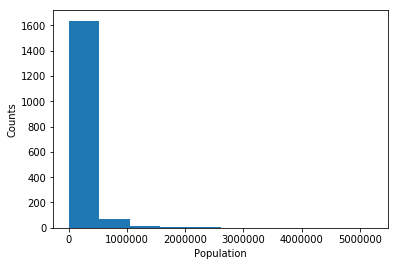

143535.94882116158
46359.0
0      15578.0
1      17137.0
2      19384.0
3      19503.0
4      20324.0
5      25403.0
6      33765.0
7      37050.0
8      43198.0
9      53955.0
10    155817.0
dtype: float64


In [263]:
#Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(merged_df['Population'])
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()
print(merged_df['Population'].mean())
print(merged_df['Population'].median())
print(merged_df['Population'].mode())

In [264]:
#Summary statistics 
#Determine mean and mode for county level hospital quality
coun_hospital_quality_mean = round(merged_df['Average Hospital'].astype('float').mean(), 2)
coun_hospital_quality_median = round(merged_df['Average Hospital'].astype('float').median(), 2)
coun_hospital_quality_mode = round(merged_df['Average Hospital'].astype('float').mode(), 2)

#Mean and mode for hospital quality across all counties
print(f"County Level Hospital Rating Mean: {coun_hospital_quality_mean}")
print(f"County Level Hospital Rating Median: {coun_hospital_quality_median}")
print(f"County Level Hospital Rating mode {coun_hospital_quality_mode}")

County Level Hospital Rating Mean: 3.31
County Level Hospital Rating Median: 3.07
County Level Hospital Rating mode 0    4.0
dtype: float64


hospital_overall_rating                                     
                         mean median       var       std       sem
state                                                             
AK                   3.400000    3.5  0.488889  0.699206  0.221108
AL                   3.039474    3.0  0.945088  0.972156  0.111514
AR                   2.806452    3.0  1.175040  1.083992  0.137667
AZ                   3.072727    3.0  0.846465  0.920035  0.124058
CA                   2.993031    3.0  1.321630  1.149621  0.067860

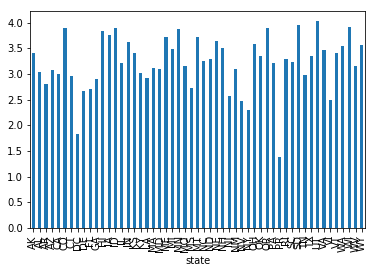

In [269]:
#Summary statistics for hospital quality for each state 
state_stats_group=hospitals_df.groupby('state').agg({'hospital_overall_rating': ['mean', 'median', 'var', 'std', 'sem']})
#Average hospital quality for each state
state_stats_group['hospital_overall_rating']['mean'].plot.bar()
#Save file and output to png
plt.savefig('barplot.png')
#Create state level dataframe
pd.DataFrame (state_stats_group)
state_stats_group.head()

In [270]:
#Create function for bar charts of state level hospital quality
def bar_chart (x_axis,y_axis):

    plt.xlim(0, max(x_axis))
    plt.ylim(0, max(y_axis)+10)

    plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")

    # Set a Title and labels
    plt.title("Average Hospital Quality per Day 5 cases")
    plt.xlabel("Hospital Quality")
    plt.ylabel("Cases by Day 5")

    # Save plot as png 
    plt.tight_layout()
    plt.savefig("bar.png")
    plt.show()

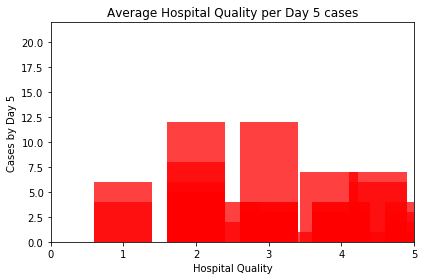

In [271]:
bar_chart (state_data['Average Hospital'], state_data['confirm_5'])

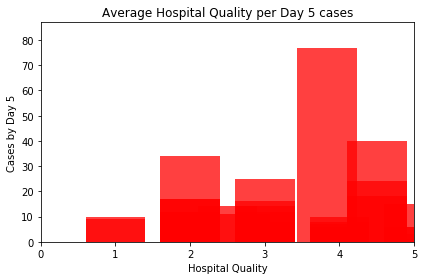

In [273]:
bar_chart (state_data['Average Hospital'], state_data['confirm_10'])

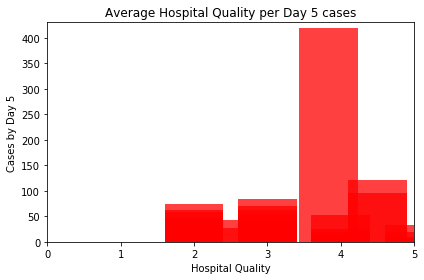

In [274]:
bar_chart (state_data['Average Hospital'], state_data['confirm_20'])

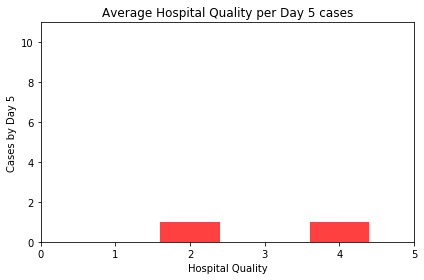

In [276]:
bar_chart (state_data['Average Hospital'], state_data['death_5'])

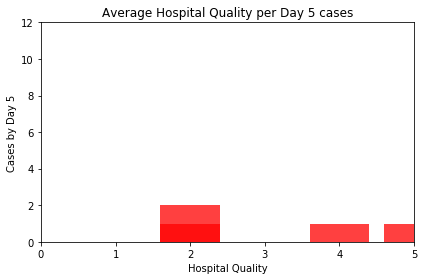

In [277]:
bar_chart (state_data['Average Hospital'], state_data['death_10'])

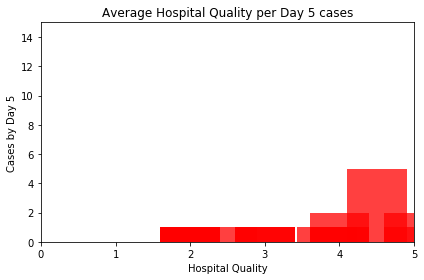

In [278]:
bar_chart (state_data['Average Hospital'], state_data['death_20'])

In [83]:
#lowest and highest case rate at day 5 across all counties 
print(f"The minimum day 5 case rate across all counties is {merged_df['confirm_5'].min()}")
print(f"The maximum day 5 case rate across all counties is {merged_df['confirm_5'].max()}")

The minimum day 5 case rate across all counties is 0.0
The maximum day 5 case rate across all counties is 83.0


In [84]:
#lowest and highest case rate at day 10 across all counties 
print(f"The minimum day 10 case rate across all counties is {merged_df['confirm_10'].min()}")
print(f"The maximum day 10 case rate across all counties is {merged_df['confirm_10'].max()}")

The minimum day 10 case rate across all counties is 0.0
The maximum day 10 case rate across all counties is 326.0


In [85]:
#lowest and highest case rate at day 20 across all counties 
print(f"The minimum day 20 case rate across all counties is {merged_df['confirm_20'].min()}")
print(f"The maximum day 20 case rate across all counties is {merged_df['confirm_20'].max()}")

The minimum day 20 case rate across all counties is 0.0
The maximum day 20 case rate across all counties is 3385.0


In [86]:
#lowest and highest case rate at day 50 across all counties 
print(f"The minimum day 50 case rate across all counties is {merged_df['confirm_50'].min()}")
print(f"The maximum day 50 case rate across all counties is {merged_df['confirm_50'].max()}")

The minimum day 50 case rate across all counties is 4.0
The maximum day 50 case rate across all counties is 190.0


In [87]:
#lowest and highest death rate at day 5 across all counties 
print(f"The minimum day 5 death rate across all counties is {merged_df['death_5'].min()}")
print(f"The maximum day 5 death rate across all counties is {merged_df['death_5'].max()}")

The minimum day 5 death rate across all counties is 0.0
The maximum day 5 death rate across all counties is 3.0


In [88]:
#lowest and highest death rate at day 10 across all counties 
print(f"The minimum day 10 death rate across all counties is {merged_df['death_10'].min()}")
print(f"The maximum day 10 death rate across all counties is {merged_df['death_10'].max()}")

The minimum day 10 death rate across all counties is 0.0
The maximum day 10 death rate across all counties is 10.0


In [89]:
#lowest and highest case rate at day 20 across all counties 
print(f"The minimum day 20 death rate across all counties is {merged_df['death_20'].min()}")
print(f"The maximum day 20 death rate across all counties is {merged_df['death_20'].max()}")

The minimum day 20 death rate across all counties is 0.0
The maximum day 20 death rate across all counties is 86.0


In [90]:
#lowest and highest death rate at day 50 across all counties 
print(f"The minimum day 50 death rate across all counties is {merged_df['death_50'].min()}")
print(f"The maximum day 50 death rate across all counties is {merged_df['death_50'].max()}")

The minimum day 50 death rate across all counties is 0.0
The maximum day 50 death rate across all counties is 22.0


In [91]:
#lowest and highest population across all counties
print(f"The minimum population across all counties is {merged_df['Population'].min()}")
print(f"The maximum population across all counties is {merged_df['Population'].max()}")

The minimum population across all counties is 2348.0
The maximum population across all counties is 5227575.0


In [82]:
#lowest and highest median income across all counties (in $1000s) observed
print(f"The minimum median income across all counties is {merged_df['Median Household Income'].min()}")
print(f"The maximum median income across all counties is {merged_df['Median Household Income'].max()}")

The minimum median income across all counties is 22174.0
The maximum median income across all counties is 125672.0


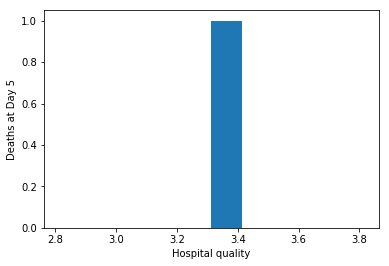

NormaltestResult(statistic=0.5074600230245496, pvalue=0.7759012581771512)


In [165]:
# Determine if the hospital quality is normally distributed
plt.hist(merged_df['Average Hospital'].mean())
plt.xlabel('Hospital quality')
plt.ylabel('Deaths at Day 5')
plt.show()
print(st.normaltest(merged_df["Average Hospital"].sample(100)))

In [236]:
#Create function for bar charts of county level hospital quality
def bar_chart (x_axis,y_axis):

    plt.xlim(0, max(x_axis))
    plt.ylim(0, max(y_axis)+10)

    plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
    #plt.xticks(tick_locations, gyms)

    # Set a Title and labels
    plt.title("Average Hospital Quality per Day 5 cases")
    plt.xlabel("Hospital Quality")
    plt.ylabel("Cases by Day 5")

    # Save our graph 
    plt.tight_layout()
    plt.savefig("bar.png")
    plt.show()

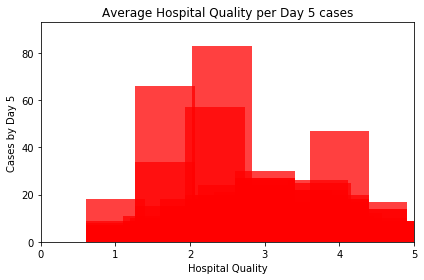

In [282]:
bar_chart (merged_df['Average Hospital'], merged_df['confirm_5'])

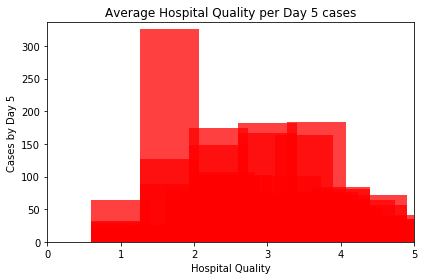

In [284]:
bar_chart (merged_df['Average Hospital'], merged_df['confirm_10'])

In [220]:
def scatterplot(x,y):
    # Convert to floats and store County level hospital rating and cases at Day 5
    temp_df=merged_df[[x,y]]
    temp_df=temp_df.dropna()
    x_values = temp_df[x].astype('float')
    y_values = temp_df[y].astype('float')
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot scatter plot
    plt.scatter(x_values,y_values)
    # Plot regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(3,np.max(y_values)*.9),fontsize=15,color="red")
    # Label plot
    plt.xlabel(x)
    plt.ylabel(y)
    # Print r square value
    print(f"R squared: {rvalue**2}")
    #save file and output to png
    plt.savefig('staterplot.png')
    # Show plot
    plt.show()

R squared: 0.007615232927483835


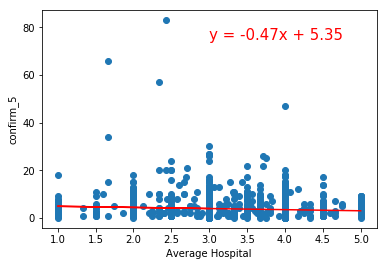

In [221]:
scatterplot('Average Hospital','confirm_5')

R squared: 0.0008793018554425203


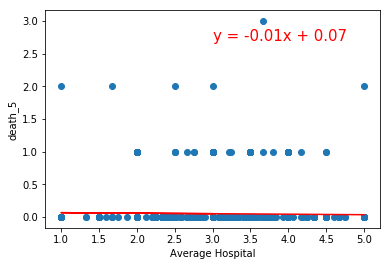

In [222]:
scatterplot('Average Hospital','death_5')

R squared: 0.010415083585345085


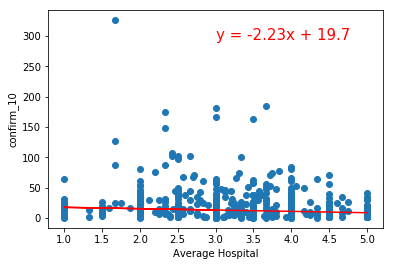

In [223]:
scatterplot('Average Hospital','confirm_10')

R squared: 0.006249711391187893


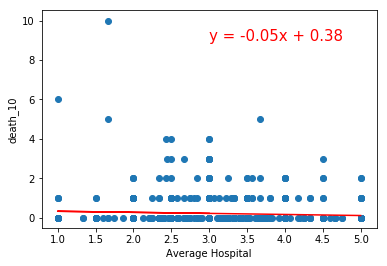

In [224]:
scatterplot('Average Hospital','death_10')

R squared: 0.01615216468047862


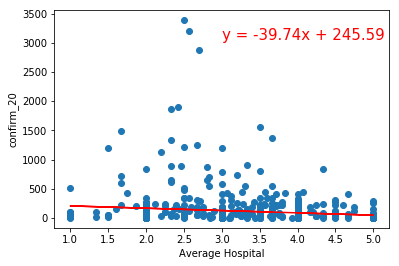

In [225]:
scatterplot('Average Hospital','confirm_20')

R squared: 0.012056771353404293


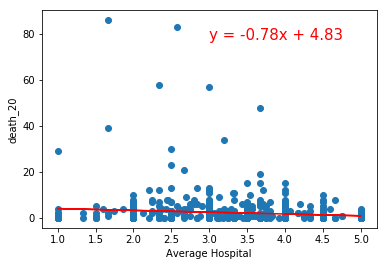

In [226]:
scatterplot('Average Hospital','death_20')

R squared: 0.8255873908393623


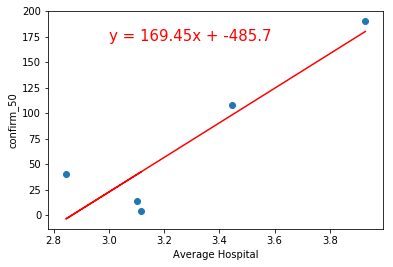

In [227]:
scatterplot('Average Hospital','confirm_50')

R squared: 0.7720996161720673


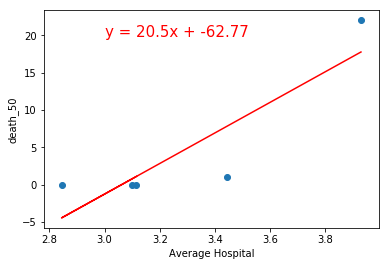

In [228]:
scatterplot('Average Hospital','death_50')

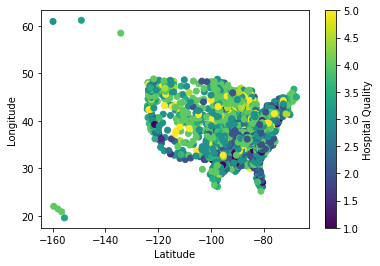

In [229]:
#plot the latitude and longitude of hospital quality using Matplotlib, color the data points using the hospital quality of the block.
plt.scatter(merged_df['Longitude'], merged_df['Latitude'], c=merged_df['Average Hospital'])
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
clb.set_label("Hospital Quality")
plt.show()

In [181]:
#Create Heat maps 
#Configure gmaps with API key
gmaps.configure(api_key=gkey)

#Removing NAN values
#merged_data_complete_df = merged_df
# Store Latitude and Longitude into  locations 
#locations = census_data_complete_df[['Latitude', 'Longitude']]

In [259]:
# Convert Poverty Rate to float and store (removing NAN values)
census_data_complete = data_df.dropna()
locations = census_data_complete[['Latitude', 'Longitude']]
poverty_rate = census_data_complete["Poverty Rate"].astype(float)

census_data_florida=census_data_complete.loc[census_data_complete['State']=='Florida']
census_data_florida

,FIPS,County,State,Latitude,Longitude,confirm_5,confirm_10,confirm_20,confirm_50,death_5,death_10,death_20,death_50,Population,Population Density,Median Household Income,Poverty Rate


In [256]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_map = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_map)
fig


Figure(layout=FigureLayout(height='420px'))

In [129]:
# Convert day 5 case rate to list
day5_case_rate = census_data_complete["confirm_5"].tolist()

In [147]:
day5_case_rate
template="<dl><dd>confirm_5: {confirm_5}</dd></dl>"
infodata=[template.format(**row) for index,row in census_data_complete.iterrows()] 
infodata

['<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 2.0</dd></dl>',
 '<dl><dd>confirm_5: 2.0</dd></dl>',
 '<dl><dd>confirm_5: 2.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>',
 '<dl><dd>confirm_5: 1.0</dd></dl>']

In [148]:
# Create day 5 case rate symbol layer
template="<dl><dd>confirm_5: {confirm_5}</dd></dl>"
infodata=[template.format(**row) for index,row in census_data_complete.iterrows()] 
day5_case_layer = gmaps.symbol_layer(
    locations, #fill_color='rgba(0, 150, 0, 0.4)',
    #stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=infodata
    #info_box_content="<dl><dd>confirm_5: 10</dd></dl>"
)

fig = gmaps.figure()
fig.add_layer(day5_case_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [150]:
# Create a combined map
fig = gmaps.figure()
fig.add_layer(heat_map)
fig.add_layer(day5_case_layer)
fig


Figure(layout=FigureLayout(height='420px'))

In [175]:
# Create day 20 case rate symbol layer
template="<dl><dd>confirm_5: {confirm_20}</dd></dl>"
infodata=[template.format(**row) for index,row in census_data_complete.iterrows()] 
day20_case_layer = gmaps.symbol_layer(
    locations, #fill_color='rgba(0, 150, 0, 0.4)',
    #stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
    info_box_content=infodata
    #info_box_content="<dl><dd>confirm_5: 10</dd></dl>"
)

fig = gmaps.figure()
fig.add_layer(day20_case_layer)
fig
print(locations)

       Latitude   Longitude
103   33.348359 -112.491815
204   34.308284 -118.228241
215   33.701475 -117.764600
220   36.603082 -121.069975
222   33.034846 -116.736533
228   37.231049 -121.697046
610   41.841448  -87.816588
1229  42.327951  -71.078504
2969  47.491379 -121.834613


In [174]:
# Create a combined map
fig = gmaps.figure()
fig.add_layer(heat_map)
fig.add_layer(day20_case_layer)
fig
print(day20_case_layer)

Markers(data_bounds=[(28.243000199014446, -144.0544709961997), (47.287638298763326, -76.3844864823759)], markers=[Symbol(display_info_box=True, fill_color=None, info_box_content='<dl><dd>confirm_5: 1.0</dd></dl>', location=(33.34835867, -112.49181540000001), scale=3, stroke_color=None), Symbol(display_info_box=True, fill_color=None, info_box_content='<dl><dd>confirm_5: 1.0</dd></dl>', location=(34.30828379, -118.22824109999999), scale=3, stroke_color=None), Symbol(display_info_box=True, fill_color=None, info_box_content='<dl><dd>confirm_5: 1.0</dd></dl>', location=(33.70147516, -117.76459979999998), scale=3, stroke_color=None), Symbol(display_info_box=True, fill_color=None, info_box_content='<dl><dd>confirm_5: 2.0</dd></dl>', location=(36.60308176, -121.069975), scale=3, stroke_color=None), Symbol(display_info_box=True, fill_color=None, info_box_content='<dl><dd>confirm_5: 2.0</dd></dl>', location=(33.03484597, -116.73653259999999), scale=3, stroke_color=None), Symbol(display_info_box=